# Klasifikasi Gambar Menggunakan Neural Network pada Dataset CIFAR-10

Dalam notebook ini, kita akan membangun model neural network untuk klasifikasi gambar menggunakan dataset CIFAR-10. Kita akan melewati langkah-langkah berikut:
1. Mempersiapkan Dataset
2. Membangun Model
3. Melatih Model
4. Evaluasi Model
5. Menyimpan Model

In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

## 1. Mempersiapkan Dataset

Kita akan mengunduh dataset CIFAR-10 dan melakukan normalisasi pada data gambar.

In [6]:
# Mempersiapkan Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## 2. Membangun Model

Model yang kita buat adalah Convolutional Neural Network (CNN) dengan beberapa lapisan konvolusi dan pooling.

In [7]:
# Membangun Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2024-11-20 14:59:15.856128: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## 3. Kompilasi Model

Model perlu dikompilasi sebelum dilatih. Kita menggunakan Adam sebagai optimizer dan sparse categorical crossentropy sebagai loss function.

In [8]:
# Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. Melatih Model

Model akan dilatih menggunakan data pelatihan dan divalidasi menggunakan data pengujian. Kita akan melatih model selama 10 epoch.

In [9]:
# Melatih Model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5245 - accuracy: 0.4395 - val_loss: 1.2210 - val_accuracy: 0.5605
Epoch 2/30
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1291 - accuracy: 0.5996 - val_loss: 1.0389 - val_accuracy: 0.6297
Epoch 3/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9695 - accuracy: 0.6585 - val_loss: 0.9375 - val_accuracy: 0.6749
Epoch 4/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8753 - accuracy: 0.6926 - val_loss: 0.9181 - val_accuracy: 0.6790
Epoch 5/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8003 - accuracy: 0.7209 - val_loss: 0.8888 - val_accuracy: 0.6958
Epoch 6/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7482 - accuracy: 0.7372 - val_loss: 0.8958 - val_accuracy: 0.6912
Epoch 7/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6991 - accuracy: 0.7541 - val_loss: 0.8752 -

## 5. Evaluasi Model

Setelah pelatihan, kita akan mengevaluasi model menggunakan data pengujian untuk melihat akurasinya.

In [17]:
# Evaluasi Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 1.6997 - accuracy: 0.6923 - 1s/epoch - 4ms/step

Test accuracy: 0.692300021648407


## 6. Plot Akurasi

Kita akan memplot akurasi pelatihan dan validasi untuk menganalisis performa model.

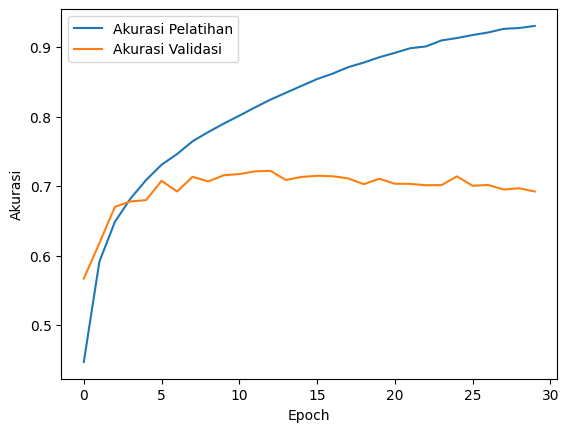

In [18]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

## 7. Summary model

## Menampilkan Ringkasan Model

Setelah kita membangun model, langkah selanjutnya adalah melihat ringkasan dari arsitektur model tersebut. Ini berguna untuk memahami jumlah parameter, struktur lapisan, dan bagaimana data mengalir melalui model.

Kita dapat menggunakan metode `summary()` untuk menampilkan informasi berikut:
- **Layer (Jenis Lapisan)**: Menunjukkan jenis lapisan dalam model, seperti Conv2D, MaxPooling2D, dan Dense.
- **Output Shape**: Menunjukkan bentuk output dari setiap lapisan.
- **Param #**: Menunjukkan jumlah parameter yang dapat dilatih dalam setiap lapisan, termasuk bobot dan bias.

Berikut adalah contoh output dari `model.summary()`:

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

## 8. Simpan Model

Setelah model dilatih dan dievaluasi, kita akan menyimpan model untuk digunakan di lain waktu.

In [19]:
# Simpan Model
model.save('cifar10_model.h5')

/experiment/alim/tugas-akhir/Alim-AI/env3.8-tf/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
